In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

import matplotlib as mpl
import folium
import plotly.express as px
import plotly.graph_objects as go
import json
from urllib.request import urlopen

## Dropped rows (with null):
> • Precipitation(in) (1998358)<br>• End_Lat (2246264)<br>• End_Lng (2246264)<br>• Number (1917605)<br>• Wind_Chill(F) (1852623)<br>• Airport_Code (5691)<br>• Pressure(in) (48142)<br>• Wind_Direction (45101)<br>• Timezone (3163)

---
## Dropped rows (no null):
> • ID<br>• Source<br>• Country<br>• Street (157,947 street names)<br>• Turning_Loop (because all False)

In [2]:
df = pd.read_csv('data/3-accidents-dummies-next.csv')

In [3]:
df.head()

,Unnamed: 0,TMC,Severity,Start_Time,End_Time,Distance(mi),Side,City,County,State,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,R,Dayton,Montgomery,OH,...,0,0,0,0,0,0,0,0,0,0
1,1,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,L,Reynoldsburg,Franklin,OH,...,0,0,0,0,0,0,0,0,0,1
2,2,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,R,Williamsburg,Clermont,OH,...,0,0,0,0,0,1,0,0,1,1
3,3,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,R,Dayton,Montgomery,OH,...,0,0,0,0,0,0,0,1,1,1
4,4,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,R,Dayton,Montgomery,OH,...,0,0,0,0,0,1,1,1,1,1


In [4]:
df.columns

Index(['Unnamed: 0', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Distance(mi)', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Weather_Timestamp', 'Temperature', 'Humidity_pct', 'Visibility_mi',
       'Windspeed_mph', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [5]:
county_df=df.County.value_counts().to_frame()

In [6]:
county_df.reset_index(inplace=True)

In [7]:
county_df.rename(columns={'index':'County', 'County':'Frequency'}, inplace=True)

In [8]:
county_df

,County,Frequency
0,Los Angeles,220085
1,Harris,96763
2,Orange,75079
3,Mecklenburg,72553
4,Dallas,68119
...,...,...
1698,Merrick,1
1699,Slope,1
1700,Musselshell,1
1701,Thayer,1


In [9]:
state_df=df.State.value_counts().to_frame()

In [10]:
state_df.reset_index(inplace=True)

In [11]:
state_df.rename(columns={'index':'State', 'State':'Frequency'}, inplace=True)

In [12]:
state_df

,State,Frequency
0,CA,645967
1,TX,290931
2,FL,219740
3,SC,143349
4,NC,141354
5,NY,136107
6,PA,88866
7,MI,88390
8,IL,86056
9,GA,82215


In [15]:
fig = go.Figure(data=go.Choropleth(locations=state_df['State'], # spatial coordinates
                z = state_df['Frequency'].astype(float), # data to be color-coded
                locationmode='USA-states',
                colorscale = 'inferno',
                colorbar_title = 'Legend:'))

fig.update_layout(title_text='Frequency Distribution of U.S. Accidents by State',
                 geo_scope='usa')

fig.show()
                

In [18]:
df.columns

Index(['Unnamed: 0', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Distance(mi)', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Weather_Timestamp', 'Temperature', 'Humidity_pct', 'Visibility_mi',
       'Windspeed_mph', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [20]:
weather_df=df.Weather_Condition.value_counts().to_frame()

In [22]:
weather_df.reset_index(inplace=True)

In [24]:
weather_df.rename(columns={'index':'Condition', 'Weather_Condition':'Frequency'}, inplace=True)

In [27]:
weather_df.columns

Index(['Condition', 'Frequency'], dtype='object')

In [47]:
weather_df.sort_values(by='Condition', inplace=True)

In [60]:
weather_df

,Condition,Frequency
56,Blowing Dust / Windy,64
41,Blowing Snow,268
0,Clear,805381
7,Cloudy,115091
26,Cloudy / Windy,2089
27,Drizzle,2032
55,Drizzle and Fog,65
3,Fair,333852
17,Fair / Windy,3741
11,Fog,21964


In [ ]:
# palette = ........
# Possible values are: 
# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, 
# BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, 
# GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, 
# OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, 
# Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, 
# PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, 
# Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, 
# RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, 
# Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, 
# Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, 
# YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, 
# binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, 
# cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, 
# cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, 
# gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, 
# gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, 
# gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, 
# gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, 
# inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, 
# nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, 
# plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, 
# seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, 
# tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
# viridis, viridis_r, vlag, vlag_r, winter, winter_r

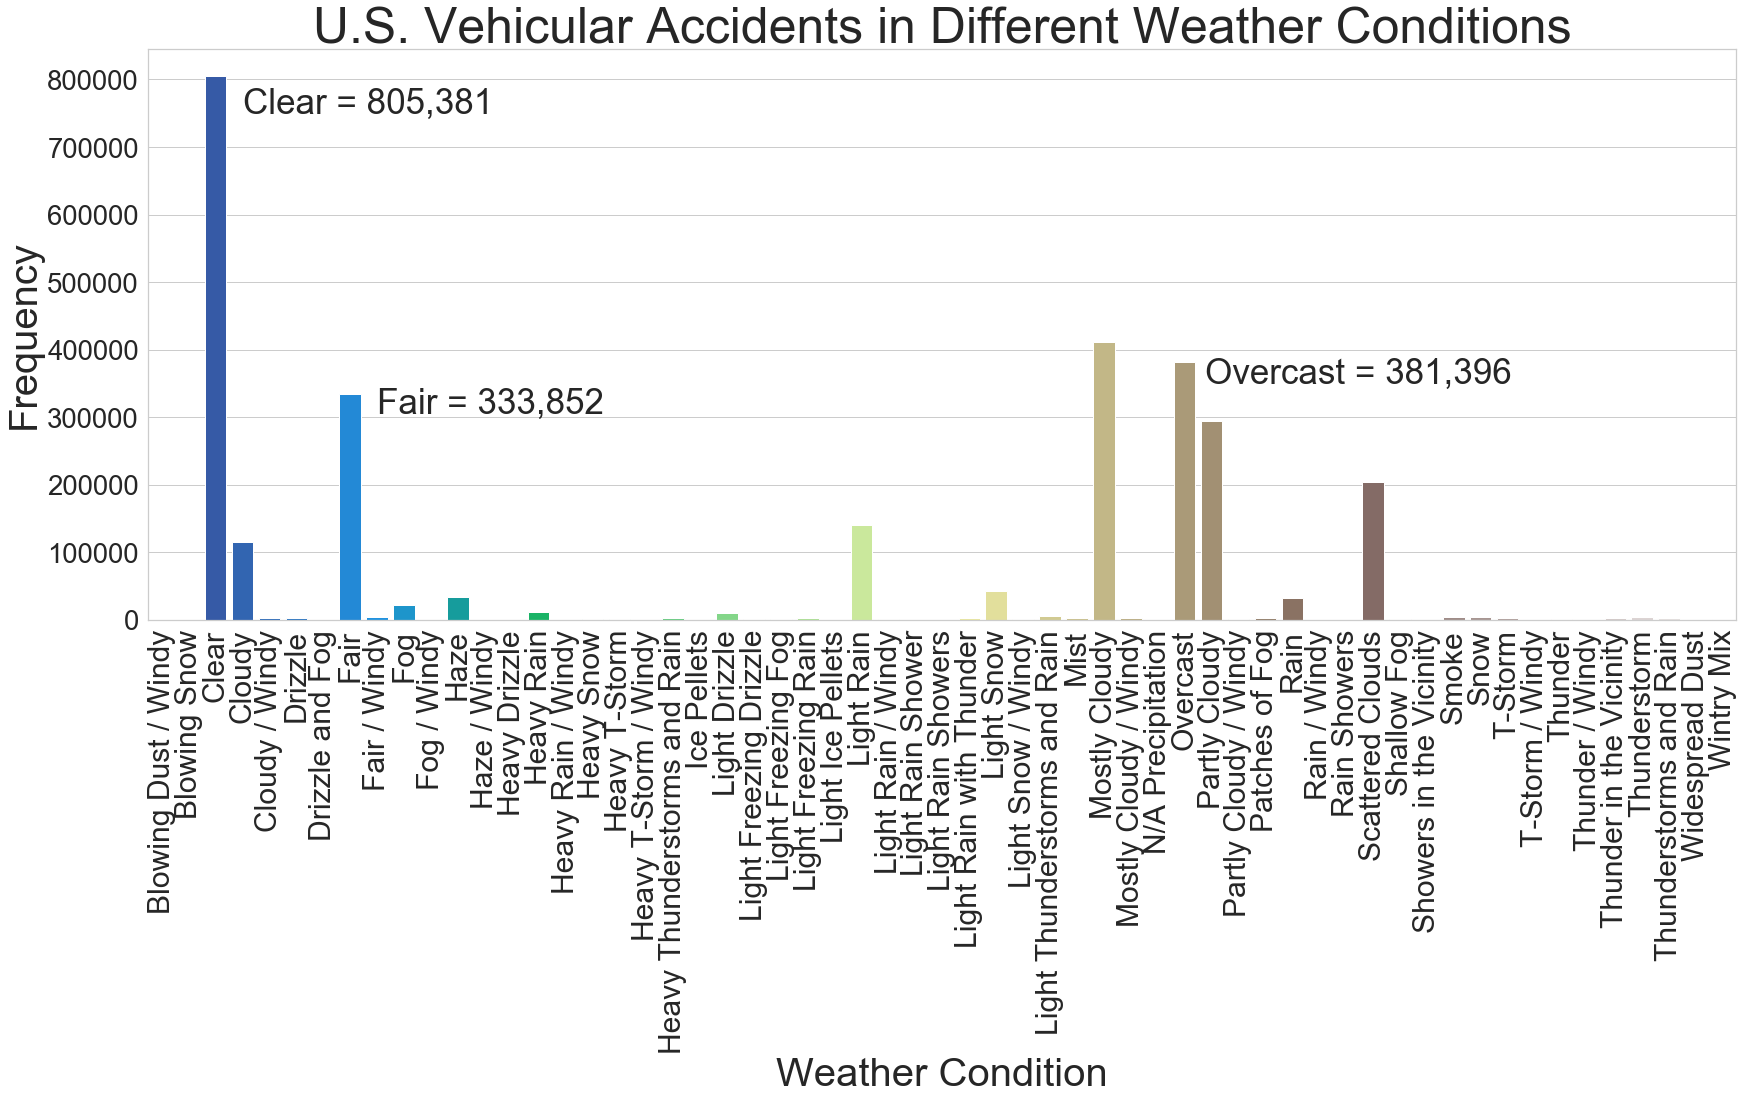

In [72]:
sns.set(style='whitegrid',
        palette='CMRmap',
        font_scale=2.5, 
        color_codes=True)

fig, ax = plt.subplots(figsize=(25,16))
ax = sns.barplot(x='Condition', y='Frequency',
                data=weather_df,
                palette='terrain')
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=90,
                  fontsize=30)
ax.set_xlabel('Weather Condition',
             fontsize=40)
ax.set_ylabel('Frequency',
             fontsize=40)
ax.set_title('U.S. Vehicular Accidents in Different Weather Conditions',
            fontsize=50)
plt.text(3, 750000, 'Clear = 805,381',
        fontsize=35)
plt.text(8, 305000, 'Fair = 333,852',
        fontsize=35)
plt.text(38.75, 350000, 'Overcast = 381,396',
        fontsize=35)
plt.tight_layout()
plt.savefig('img/weather.jpg')

## Begin Folium

In [73]:
m = folium.Map(location=[45.5236, -122.6750])
m